In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings('ignore')

In [2]:
pip install arcticdata

In [3]:
import arcticdata.ExploratoryDataAnalysis as eda

In [4]:
Dataset = pd.read_csv('amazon_alexa.tsv', delimiter='\t')

In [5]:
Dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
Dataset.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [7]:
Dataset.shape

(3150, 5)

In [8]:
Dataset.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


1    2893
0     257
Name: feedback, dtype: int64


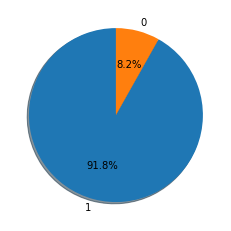

In [10]:
# Getting the count of people feedback either 1 or 0
feedback_categories = Dataset['feedback'].value_counts()
print(feedback_categories)

# Using matplotlib pie chart and label the pie chart
plt.pie(feedback_categories,labels=['1','0'],autopct='%1.1f%%',shadow=True,startangle=90);

In [11]:
Dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [12]:
Dataset.describe(include = 'object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Name: variation, dtype: int64


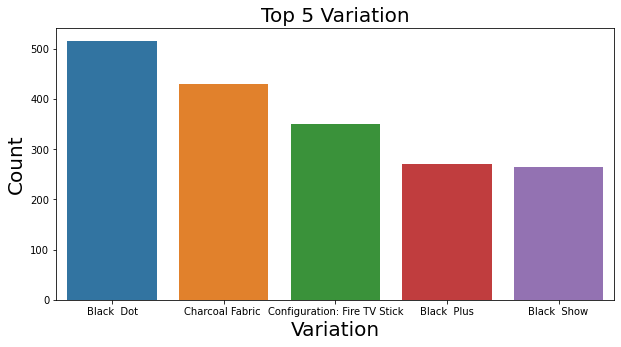

In [13]:
# value counts of variation 
variation_types = Dataset.variation.value_counts()[:5]
print(variation_types)

# plotting top 5 variation 

plt.figure(figsize=(10, 5))
sns.barplot(variation_types.index, variation_types);
plt.xlabel('Variation', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Top 5 Variation', fontsize=20);

In [14]:
Dataset['count'] = Dataset['verified_reviews'].map(len)
Dataset['count']

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: count, Length: 3150, dtype: int64

In [15]:
#  displaying data based on len 

Dataset.groupby('count').describe().sample(10)

rating                                                feedback  \
       count      mean       std  min   25%  50%   75%  max    count   
count                                                                  
145      3.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      3.0   
214      3.0  4.333333  0.577350  4.0  4.00  4.0  4.50  5.0      3.0   
329      2.0  4.000000  0.000000  4.0  4.00  4.0  4.00  4.0      2.0   
333      4.0  4.250000  1.500000  2.0  4.25  5.0  5.00  5.0      4.0   
64      12.0  4.416667  1.164500  1.0  4.00  5.0  5.00  5.0     12.0   
334      2.0  3.500000  2.121320  2.0  2.75  3.5  4.25  5.0      2.0   
652      2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   
519      1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0      1.0   
168     10.0  4.500000  1.269296  1.0  5.00  5.0  5.00  5.0     10.0   
392      2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   

                                                      
           mean       std  min   25%  50%   75%  max  
count                                                 
145    1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
214    1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
329    1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
333    0.750000  0.500000  0.0  0.75  1.0  1.00  1.0  
64     0.916667  0.288675  0.0  1.00  1.0  1.00  1.0  
334    0.500000  0.707107  0.0  0.25  0.5  0.75  1.0  
652    1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
519    1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
168    0.900000  0.316228  0.0  1.00  1.0  1.00  1.0  
392    1.000000  0.000000  1.0  1.00  1.0  1.00  1.0

In [16]:
# displaying the data according to the Ratings 

Dataset.groupby('rating').describe()

feedback                                      count              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.187500   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.595303  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

In [17]:
# displaying data based according to the feedback 

Dataset.groupby('feedback').describe()

rating                                                count  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.241245  236.325955  1.0  53.0  137.0  289.0  1686.0  
1         124.659177  174.624491  1.0  29.0   69.0  154.0  2851.0

In [18]:
Dataset.head()

,rating,date,variation,verified_reviews,feedback,count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


    DATA VISUALIZATION

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


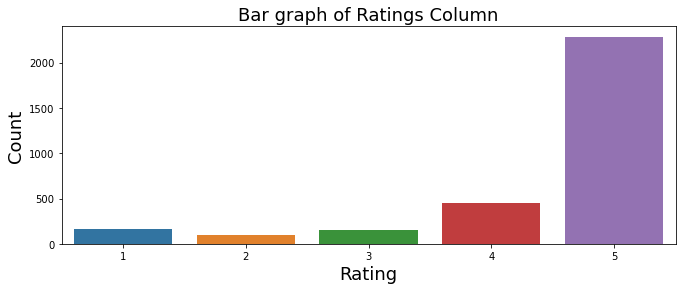

In [19]:
# Counting the each label in rating

rating_types_count = Dataset.rating.value_counts()
print(rating_types_count)

# Plotting barplot for rating column

plt.figure(figsize=(11, 4))
sns.barplot(rating_types_count.index, rating_types_count);
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Count', fontsize=18);
plt.title('Bar graph of Ratings Column', fontsize=18);

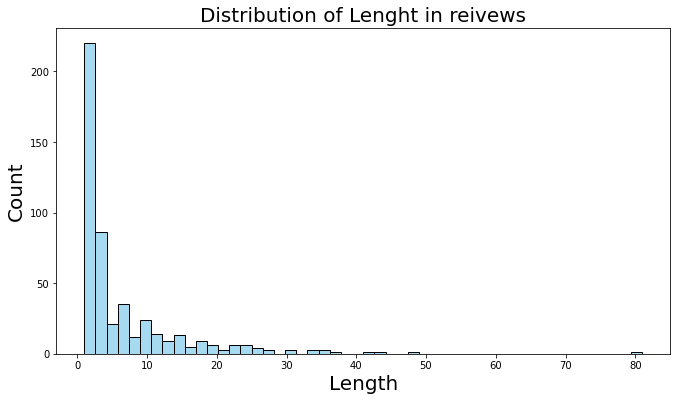

In [20]:
# histogram Graph of count of reivews 

Count_type = Dataset['count'].value_counts()
plt.figure(figsize=(11, 6))
sns.histplot(Count_type, bins=50, color='skyblue');
plt.xlabel('Length', fontsize=20)
plt.ylabel('Count', fontsize=20);
plt.title('Distribution of Lenght in reivews', fontsize=20);

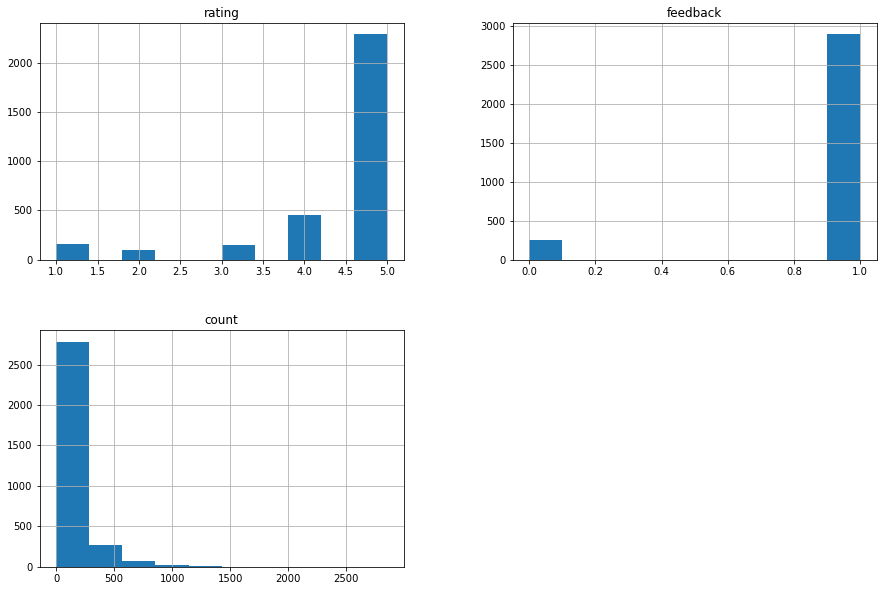

In [21]:
# histogram Graph of each column/attribute

num_bins = 10
Dataset.hist(bins=num_bins, figsize=(15,10))
plt.savefig("each attribute_histogram_plots")
plt.show()

In [22]:
# Let's Check some of the reviews according to thier lengths 

Dataset[Dataset['count'] == 1]['verified_reviews'].iloc[0]

'😍'

In [23]:
Dataset[Dataset['count'] == 150]['verified_reviews'].iloc[0]

"Got this on Amazon prime with the ring pro. Work really great. Being the lazy guy I am I don't need to go see who at my door anymore while I'm gaming."

The feature count is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 238
-Outliers   3*IQR: 102


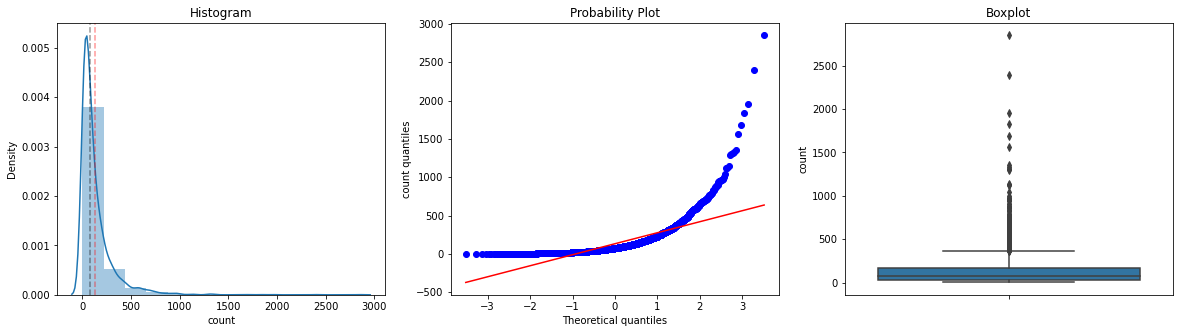

In [24]:
eda.feature_analysis(Dataset,'count')

The feature feedback is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 257
-Outliers   3*IQR: 257


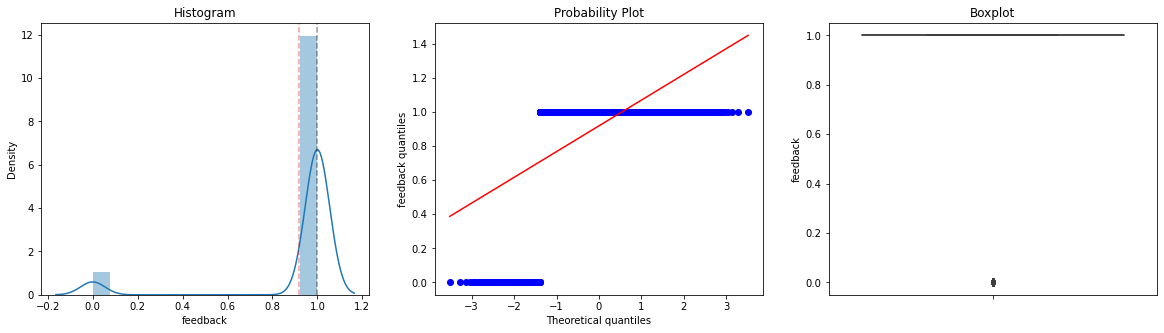

In [25]:
eda.feature_analysis(Dataset,'feedback')

The feature rating is NUMERIC

-Missing values in training set: 0
-Outliers 1.5*IQR: 257
-Outliers   3*IQR: 0


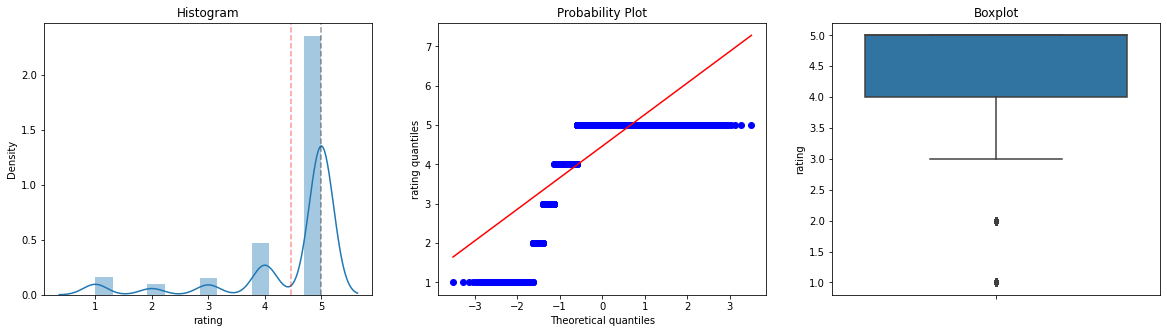

In [26]:
eda.feature_analysis(Dataset,'rating')

In [27]:
# CountVectorrizer 
count_vector = CountVectorizer(stop_words='english') 

words = count_vector.fit_transform(Dataset.verified_reviews)
sum_words = words.sum(axis=0)
word_freq = [(w, sum_words[0, idx]) for w, idx in count_vector.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)

''' creating dataframe '''
Frequently = pd.DataFrame(word_freq, columns=['word', 'freq'])

In [28]:
Frequently

,word,freq
0,love,956
1,echo,839
2,great,729
3,alexa,632
4,music,540
...,...,...
3779,scratch,1
3780,traveling,1
3781,ban,1
3782,installs,1


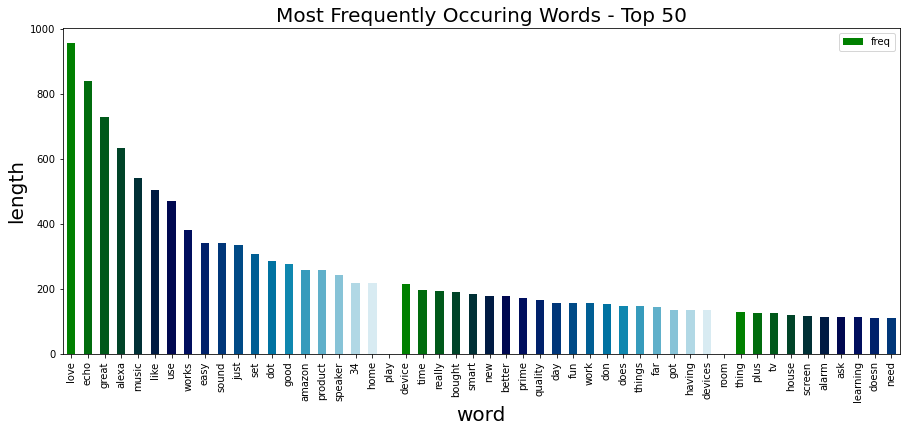

In [29]:
# barplot of top 50 frequently occuring words 

color = plt.cm.ocean(np.linspace(0, 1, 20))
Frequently.head(50).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 50", fontsize=20)
plt.xlabel('word', fontsize=20)
plt.ylabel('length', fontsize=20);


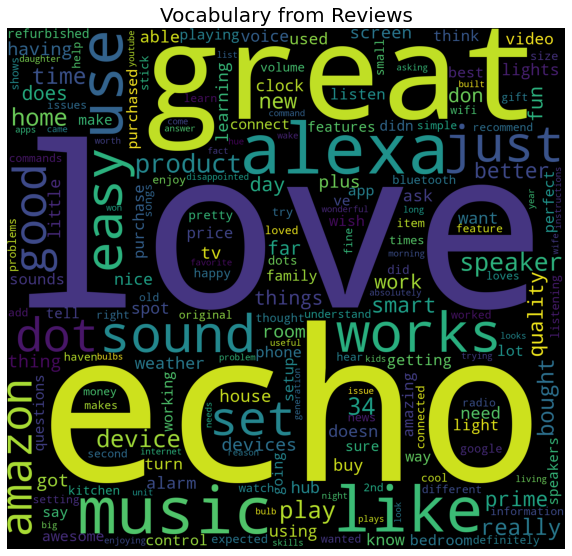

In [30]:
# representing words on WordCloud 

word_cloud = WordCloud(background_color='black', width=1500, height=1400).generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(word_cloud)
plt.title("Vocabulary from Reviews", fontsize = 20);

In [31]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
l = []

for i in range(0, 3150):
    ''' removing characters except a-z and A-Z'''
    reg = re.sub('[^a-zA-Z]', ' ', Dataset['verified_reviews'][i])
    ''' converting every word into lower word'''
    reg = reg.lower()
    ''' splitting text '''
    reg = reg.split()
    ''' apllying Stemming '''
    ps = PorterStemmer()
    ''' removing stopwords '''
    sw = stopwords.words('english')
    sw.remove('not')
    reg = [ps.stem(word) for word in reg if not word in set(sw)]
    reg = ' '.join(reg)
    l.append(reg)

In [33]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [34]:
# count vectorizer 
cv = CountVectorizer(max_features=2500) 

# independent and dependent variables 
X = cv.fit_transform(l).toarray()
y = Dataset.iloc[:, 4].values

In [35]:
#  checking shape 

print(X.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [36]:
# train test split 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

In [37]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)

shape of X_train:  (2362, 2500)
shape of X_test:  (788, 2500)


In [38]:
# Min Max Scaler 
min_max_sc = MinMaxScaler()

X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Classifier 
rf = RandomForestClassifier()

# fit on data 
rf = rf.fit(X_train, y_train)

# prediction 
y_pred = rf.predict(X_test)

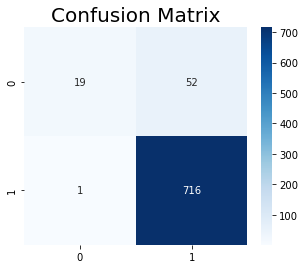

In [40]:
# confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g');
plt.title('Confusion Matrix', fontsize=20);

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[ 19  52]
 [  1 716]]


In [42]:
# classification report of model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.27      0.42        71
           1       0.93      1.00      0.96       717

    accuracy                           0.93       788
   macro avg       0.94      0.63      0.69       788
weighted avg       0.93      0.93      0.92       788



In [43]:
# accuracy score of model
print(accuracy_score(y_test, y_pred))

0.932741116751269


In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
# Navie Bayes Classifier
nbc = MultinomialNB()

# fit on data 
nbc = nbc.fit(X_train, y_train)

# prediction 
y_pred1 = nbc.predict(X_test)

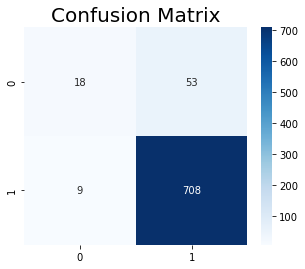

In [46]:
# confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap='Blues', fmt='g');
plt.title('Confusion Matrix', fontsize=20);

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred1))

[[ 18  53]
 [  9 708]]


In [48]:
# classification report of model
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.25      0.37        71
           1       0.93      0.99      0.96       717

    accuracy                           0.92       788
   macro avg       0.80      0.62      0.66       788
weighted avg       0.91      0.92      0.90       788



In [49]:
# accuracy score of model
print(accuracy_score(y_test, y_pred1))

0.9213197969543148


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
lr = LogisticRegression()

# fit on data 
lr = lr.fit(X_train, y_train)

# prediction of test data results
y_pred2 = lr.predict(X_test)

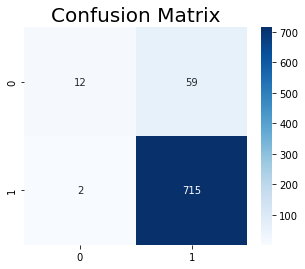

In [51]:
# confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap='Blues', fmt='g');
plt.title('Confusion Matrix', fontsize=20);

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred2))

[[ 12  59]
 [  2 715]]


In [53]:
# classification report of model
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.17      0.28        71
           1       0.92      1.00      0.96       717

    accuracy                           0.92       788
   macro avg       0.89      0.58      0.62       788
weighted avg       0.92      0.92      0.90       788



In [54]:
# accuracy score of model
print(accuracy_score(y_test, y_pred2))

0.9225888324873096


# SVM

In [55]:
from sklearn.svm import SVC

# Support Vector Machine
classifier = SVC(kernel='linear',random_state=0)

# fit on data
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [56]:
# prediction of test data results

y_pred3 = classifier.predict(X_test)

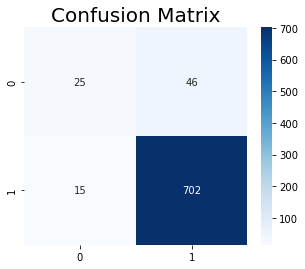

In [57]:
# confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap='Blues', fmt='g');
plt.title('Confusion Matrix', fontsize=20);

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred3))

[[ 25  46]
 [ 15 702]]


In [59]:
# classification report of model
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.35      0.45        71
           1       0.94      0.98      0.96       717

    accuracy                           0.92       788
   macro avg       0.78      0.67      0.70       788
weighted avg       0.91      0.92      0.91       788



In [60]:
# accuracy score of model
print(accuracy_score(y_test, y_pred3))

0.9225888324873096


# MLP Classifier Neural Network

In [61]:
from sklearn.neural_network import MLPClassifier

In [62]:
# MLP Classifier
mlpC = MLPClassifier(random_state=35, max_iter=250)
# fit on data
mlpC.fit(X_train, y_train)

MLPClassifier(max_iter=250, random_state=35)

In [63]:
# prediction of test data results
y_pred4 = mlpC.predict(X_test)

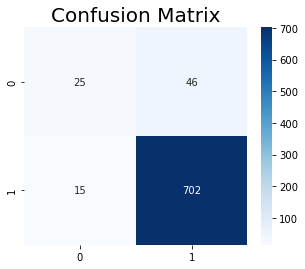

In [64]:
# confusion matrix 

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap='Blues', fmt='g');
plt.title('Confusion Matrix', fontsize=20);

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred4))

[[ 27  44]
 [ 11 706]]


In [66]:
# classification report of model
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        71
           1       0.94      0.98      0.96       717

    accuracy                           0.93       788
   macro avg       0.83      0.68      0.73       788
weighted avg       0.92      0.93      0.92       788



In [67]:
# accuracy score of model
print(accuracy_score(y_test, y_pred4))

0.9302030456852792


# Analysis of Machine Learning Algorithms

<function matplotlib.pyplot.show(close=None, block=None)>

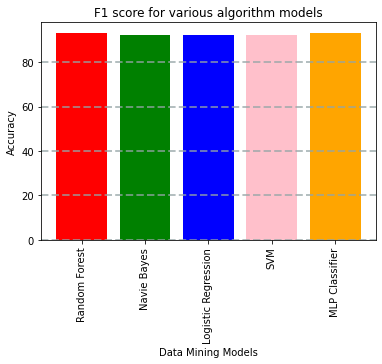

In [68]:
F1score = [93.14, 92.13, 92.25, 92.25, 93.02]
model = ['Random Forest', 'Navie Bayes', 'Logistic Regression', 'SVM', 'MLP Classifier']
plt.xticks(range(len(F1score)), model)
plt.xlabel('Data Mining Models')
plt.ylabel('Accuracy')
plt.title('F1 score for various algorithm models')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.bar(range(len(F1score)), F1score, color=['red', 'green', 'blue', 'pink', 'orange']) 
plt.xticks(rotation=90)
plt.show

# Hence, Random Forest Classifier has the High F1-Score Compare to Other Algorithms

# Applying HyperParameter Tuning For Random Forest Classifier

In [69]:
p = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [70]:
grid_cv = GridSearchCV(estimator=rf, param_grid=p, cv=10, verbose=0, scoring='accuracy', n_jobs=-1, 
                       return_train_score=True)
grid_cv.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='accuracy')

In [71]:
print("Best Parameter : {}".format(grid_cv.best_params_))

Best Parameter : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 100}


In [72]:
rf_cv = RandomForestClassifier(bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=300)

# fit on data 
rf_cv.fit(X_train, y_train)

# prediction of test data results
pred = rf_cv.predict(X_test)

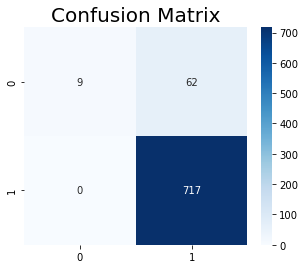

In [73]:
# confusion matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues", fmt='g');
plt.title('Confusion Matrix', fontsize=20);

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,pred))

[[  9  62]
 [  0 717]]


In [75]:
# classification report of model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.13      0.22        71
           1       0.92      1.00      0.96       717

    accuracy                           0.92       788
   macro avg       0.96      0.56      0.59       788
weighted avg       0.93      0.92      0.89       788



In [76]:
# accuracy score of modelafter hyper tuning
print(accuracy_score(y_test, pred))

0.9213197969543148


In [77]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return rf.predict(temp)

In [78]:
# Predicting values
sample_review = 'Sound is terrible if u want good music too get a bose'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review.')
else:
  print('This is a NEGATIVE review!')

This is a NEGATIVE review!
